In [1]:
import os

# Set these BEFORE importing TensorFlow
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
os.environ['TF_INTRA_OP_PARALLELISM_THREADS'] = '4'
os.environ['TF_INTER_OP_PARALLELISM_THREADS'] = '2'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # Suppress TF logging

# Only import TensorFlow AFTER setting environment variables
import tensorflow as tf

E0000 00:00:1762798518.243134  126940 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1762798518.249283  126940 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1762798518.265594  126940 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1762798518.265620  126940 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1762798518.265622  126940 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1762798518.265624  126940 computation_placer.cc:177] computation placer already registered. Please check linka

In [2]:
from model import create_model

nn4_small2 = create_model()

In [3]:
nn4_small2.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 96, 96, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d      │ (None, 102, 102,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1 (Conv2D)      │ (None, 48, 48,    │      9,472 │ zero_padding2d[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn1                 │ (None, 48, 48,    │        256 │ conv1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 48, 48,    │          0 │ bn1[0][0]         │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_1    │ (None, 50, 50,    │          0 │ activation[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 24, 24,    │          0 │ zero_padding2d_1… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lrn_1 (Lambda)      │ (None, 24, 24,    │          0 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2 (Conv2D)      │ (None, 24, 24,    │      4,160 │ lrn_1[0][0]       │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn2                 │ (None, 24, 24,    │        256 │ conv2[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 24, 24,    │          0 │ bn2[0][0]         │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_2    │ (None, 26, 26,    │          0 │ activation_1[0][… │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3 (Conv2D)      │ (None, 24, 24,    │    110,784 │ zero_padding2d_2… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn3                 │ (None, 24, 24,    │        768 │ conv3[0][0]       │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 24, 24,    │          0 │ bn3[0][0]         │
│ (Activation)        │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lrn_2 (Lambda)      │ (None, 24, 24,    │          0 │ activation_2[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_3    │ (None, 26, 26,    │          0 │ lrn_2[0][0]     

 Total params: 3,743,280 (14.28 MB)

 Trainable params: 3,733,968 (14.24 MB)

 Non-trainable params: 9,312 (36.38 KB)

In [4]:
from keras import backend as K
from keras.models import Model
from keras.layers import Input, Layer

# Input for anchor, positive and negative images
in_a = Input(shape=(96, 96, 3), name='input_layer_1')
in_p = Input(shape=(96, 96, 3), name='input_layer_2')
in_n = Input(shape=(96, 96, 3), name='input_layer_3')


# Output for anchor, positive and negative embedding vectors
# The nn4_small model instance is shared (Siamese network)
emb_a = nn4_small2(in_a)
emb_p = nn4_small2(in_p)
emb_n = nn4_small2(in_n)

class TripletLossLayer(Layer):
    def __init__(self, alpha=0.2, **kwargs):
        self.alpha = alpha
        super(TripletLossLayer, self).__init__(**kwargs)
    
    def triplet_loss(self, inputs):
        a, p, n = inputs
        p_dist = tf.reduce_sum(tf.square(a - p), axis=-1)
        n_dist = tf.reduce_sum(tf.square(a - n), axis=-1)
        # return tf.reduce_sum(tf.maximum(p_dist - n_dist + self.alpha, 0), axis=0)
        return tf.maximum(p_dist - n_dist + self.alpha, 0.0)
    
    def call(self, inputs):
        # loss = self.triplet_loss(inputs)
        loss = tf.reduce_mean(self.triplet_loss(inputs))
        self.add_loss(loss)
        return loss

# Layer that computes the triplet loss from anchor, positive and negative embedding vectors
triplet_loss_layer = TripletLossLayer(alpha=0.2)([emb_a, emb_p, emb_n])

# Model that can be trained with anchor, positive negative images
# nn4_small2_train = Model([in_a, in_p, in_n], triplet_loss_layer)
nn4_small2_train = Model(
    inputs={
        'input_layer_1': in_a,
        'input_layer_2': in_p,
        'input_layer_3': in_n
    },
    outputs=triplet_loss_layer
)


In [5]:
nn4_small2_train.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 96, 96, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_2       │ (None, 96, 96, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_3       │ (None, 96, 96, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ functional          │ (None, 128)       │  3,743,280 │ input_layer_1[0]… │
│ (Functional)        │                   │            │ input_layer_2[0]… │
│                     │                   │            │ input_layer_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ triplet_loss_layer  │ ()                │          0 │ functional[0][0], │
│ (TripletLossLayer)  │                   │            │ functional[1][0], │
│                     │                   │            │ functional[2][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 3,743,280 (14.28 MB)

 Trainable params: 3,733,968 (14.24 MB)

 Non-trainable params: 9,312 (36.38 KB)

In [6]:
import cv2
import numpy as np
import os
from keras import backend as K
from keras.models import Model
from keras.layers import Input, Layer
from align import AlignDlib

# Define image loading function
def load_image(path):
    """Load image from path"""
    img = cv2.imread(path, 1)
    return img[...,::-1] if img is not None else None

# Initialize alignment
alignment = AlignDlib('models/landmarks.dat')

class IdentityMetadata():
    def __init__(self, base, name, file):
        self.base = base
        self.name = name
        self.file = file
        
    def image_path(self):
        return os.path.join(self.base, self.name, self.file)

def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        person_dir = os.path.join(path, i)
        if os.path.isdir(person_dir):
            for f in os.listdir(person_dir):
                if f.endswith(('.jpg', '.jpeg', '.png')):
                    metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

# Load metadata globally
metadata = load_metadata('dataset')

def load_and_preprocess_image(image_path):
    """Load and preprocess a single image"""
    img = load_image(image_path)
    bb = alignment.getLargestFaceBoundingBox(img)
    if bb is None:
        return None
    aligned = alignment.align(96, img, bb, landmarkIndices=AlignDlib.OUTER_EYES_AND_NOSE)
    aligned = aligned.astype('float32') / 255.0
    return aligned

def get_triplets_from_metadata(metadata, num_triplets):
    """Generate triplets from metadata"""
    triplets = []
    identities = np.unique([m.name for m in metadata])
    
    for _ in range(num_triplets):
        anchor_id = np.random.choice(identities)
        pos_items = [m for m in metadata if m.name == anchor_id]
        neg_items = [m for m in metadata if m.name != anchor_id]
        
        if len(pos_items) < 2:
            continue
            
        anchor_item, pos_item = np.random.choice(pos_items, size=2, replace=False)
        neg_item = np.random.choice(neg_items)
        triplets.append((anchor_item, pos_item, neg_item))
    return triplets

def create_triplet_generator(metadata):
    """Create a generator function with access to metadata"""
    def generator(batch_size=32):
        while True:
            triplets = get_triplets_from_metadata(metadata, batch_size)
            
            anchor_batch = []
            positive_batch = []
            negative_batch = []
            
            for anchor, positive, negative in triplets:
                a_img = load_and_preprocess_image(anchor.image_path())
                p_img = load_and_preprocess_image(positive.image_path())
                n_img = load_and_preprocess_image(negative.image_path())
                
                if all(img is not None for img in [a_img, p_img, n_img]):
                    anchor_batch.append(a_img)
                    positive_batch.append(p_img)
                    negative_batch.append(n_img)
            
            if len(anchor_batch) == 0:
                continue
                
            anchor_batch = np.array(anchor_batch)
            positive_batch = np.array(positive_batch)
            negative_batch = np.array(negative_batch)
            
            yield {
                'input_layer_1': anchor_batch,
                'input_layer_2': positive_batch,
                'input_layer_3': negative_batch
            }, np.zeros((len(anchor_batch), 1))

    return generator

# Create dataset
train_dataset = tf.data.Dataset.from_generator(
    create_triplet_generator(metadata),
    output_signature=(
        {
            'input_layer_1': tf.TensorSpec(shape=(None, 96, 96, 3), dtype=tf.float32),
            'input_layer_2': tf.TensorSpec(shape=(None, 96, 96, 3), dtype=tf.float32),
            'input_layer_3': tf.TensorSpec(shape=(None, 96, 96, 3), dtype=tf.float32)
        },
        tf.TensorSpec(shape=(None, 1), dtype=tf.float32)
    )
).prefetch(tf.data.AUTOTUNE)

# Recompile model with modified learning rate and optimizer
nn4_small2_train.compile(
    optimizer=tf.keras.optimizers.Adam(
        learning_rate=0.001,  # Lower learning rate 
        beta_1=0.9,
        beta_2=0.999,
        epsilon=1e-8
    )
)

# # Train the model
history = nn4_small2_train.fit(
    train_dataset,
    steps_per_epoch=10,
    epochs=1,
    verbose=1
)

10/10 ━━━━━━━━━━━━━━━━━━━━ 303s 27s/step - loss: 0.1675
10/10 ━━━━━━━━━━━━━━━━━━━━ 303s 27s/step - loss: 0.1675


# Save the trained model and face embeddings

In [7]:
import pickle
import os
import numpy as np
from keras.models import load_model, Model
from align import AlignDlib
import cv2

# Create directory to save outputs if it doesn't exist
os.makedirs('outputs', exist_ok=True)

# Save the model first
model_path = 'outputs/face_recognition_model.h5'
if not os.path.exists(model_path):
    print("Saving the model...")
    # Save the full model with triplet loss structure
    nn4_small2_train.save(model_path)
    print(f"Model saved to {model_path}")
    
    # Also save model weights in case we need them separately
    weights_path = 'outputs/face_recognition.weights.h5'
    nn4_small2_train.save_weights(weights_path)
    print(f"Model weights saved to {weights_path}")
    
    # Save training history if available
    if 'history' in globals():
        history_path = 'outputs/training_history.pkl'
        with open(history_path, 'wb') as f:
            pickle.dump(history.history, f)
        print(f"Training history saved to {history_path}")
else:
    print(f"Model already exists at {model_path}")

# Create and save the embeddings for future use
# This will help speed up recognition in the future
def save_face_embeddings():
    print("Generating and saving face embeddings...")
    
    nn4_small2.load_weights('weights/nn4.small2.v1.h5')
    embedding_model = Model(inputs=nn4_small2.input, 
                           outputs=nn4_small2.get_layer('dense_layer').output)
    
    
    embeddings = {}
    
    for person in metadata:
        if person.name not in embeddings:
            embeddings[person.name] = []
            
        img_path = person.image_path()
        img = load_image(img_path)
        
        if img is None:
            print(f"Warning: Could not load image {img_path}")
            continue
        
        bb = alignment.getLargestFaceBoundingBox(img)
        if bb is not None:
            aligned = alignment.align(96, img, bb, landmarkIndices=AlignDlib.OUTER_EYES_AND_NOSE)
            if aligned is not None:
                aligned = aligned.astype('float32') / 255.0
                
                # Get embedding
                embedding = embedding_model.predict(np.expand_dims(aligned, axis=0), verbose=0)[0]
                embedding = embedding / np.linalg.norm(embedding)  # L2 normalize
                
                embeddings[person.name].append(embedding)
                print(f"Generated embedding for {person.name} - {os.path.basename(img_path)}")
    
    # Average embeddings for each person
    average_embeddings = {}
    for person, embs in embeddings.items():
        if embs:  # Only process if we have embeddings
            average_embeddings[person] = np.mean(embs, axis=0)
            # Normalize again after averaging
            average_embeddings[person] = average_embeddings[person] / np.linalg.norm(average_embeddings[person])
    
    # Save embeddings
    embeddings_path = 'outputs/face_embeddings.pkl'
    with open(embeddings_path, 'wb') as f:
        pickle.dump(average_embeddings, f)
    
    print(f"Saved embeddings for {len(average_embeddings)} people to {embeddings_path}")
    return average_embeddings

# Call the function to save embeddings if needed
if not os.path.exists('outputs/face_embeddings.pkl'):
    save_face_embeddings()
else:
    print("Face embeddings already exist, skipping generation")

print("\nAll processing completed!")

Model already exists at outputs/face_recognition_model.h5
Face embeddings already exist, skipping generation

All processing completed!


# ###Final Output###

# Import Libraries

In [8]:
import os
import csv
import datetime
import cv2
import numpy as np
import pickle
import math
from keras import backend as K
from keras.models import Model
from align import AlignDlib

# Face Recognition Real-time Function

In [9]:
def recognize_face_realtime():
    """Real-time face recognition"""
    # Initialize face detection
    alignment = AlignDlib('models/landmarks.dat')
    
    # Create model for inference
    print("Creating fresh model for inference...")
    nn4_small2.load_weights('weights/nn4.small2.v1.h5')
    print("Loaded pre-trained model weights")
    
    # Create embedding model
    embedding_layer_name = 'dense_layer'
    print(f"Using '{embedding_layer_name}' as embedding layer")
    embedding_model = Model(inputs=nn4_small2.input, outputs=nn4_small2.get_layer(embedding_layer_name).output)
    
    # Try to load pre-saved embeddings first (faster)
    known_embeddings = {}
    embeddings_path = 'outputs/face_embeddings.pkl'
    
    if os.path.exists(embeddings_path):
        print(f"Loading pre-saved embeddings from {embeddings_path}")
        try:
            with open(embeddings_path, 'rb') as f:
                loaded_data = pickle.load(f)
                
                # Check if loaded_data is already in the right format (dict of numpy arrays)
                if isinstance(loaded_data, dict):
                    # Verify each embedding is a numpy array
                    for name, embedding in loaded_data.items():
                        if isinstance(embedding, np.ndarray):
                            known_embeddings[name] = embedding
                        else:
                            print(f"Warning: Embedding for {name} is not a numpy array, will be re-computed")
                else:
                    print("Loaded embeddings are not in the expected format, will re-compute")
                
            print(f"Loaded {len(known_embeddings)} valid pre-saved embeddings")
        except Exception as e:
            print(f"Error loading embeddings: {e}")
            known_embeddings = {}
            
    # If no pre-saved embeddings or they failed to load, generate them
    if not known_embeddings:
        print("Computing face embeddings from images...")
        known_embeddings = {}
        
        for person in metadata:
            img = load_image(person.image_path())
            if img is None:
                print(f"Warning: Could not load image {person.image_path()}")
                continue
                
            bb = alignment.getLargestFaceBoundingBox(img)
            if bb is not None:
                aligned = alignment.align(96, img, bb, landmarkIndices=AlignDlib.OUTER_EYES_AND_NOSE)
                if aligned is not None:
                    aligned = aligned.astype('float32') / 255.0
                    embedding = embedding_model.predict(np.expand_dims(aligned, axis=0), verbose=0)[0]
                    embedding = embedding / np.linalg.norm(embedding)  # L2 normalize
                    
                    if person.name in known_embeddings:
                        # Average the embeddings
                        prev_embedding = known_embeddings[person.name]
                        known_embeddings[person.name] = (prev_embedding + embedding) / 2
                    else:
                        known_embeddings[person.name] = embedding
                    print(f"  Added embedding for {person.name}")
        
        # Save the computed embeddings for future use
        try:
            with open(embeddings_path, 'wb') as f:
                pickle.dump(known_embeddings, f)
            print(f"Saved {len(known_embeddings)} embeddings to {embeddings_path}")
        except Exception as e:
            print(f"Error saving embeddings: {e}")
    
    print(f"Using embeddings for {len(known_embeddings)} people")

    # Make sure we have at least one embedding
    if len(known_embeddings) == 0:
        print("Error: No face embeddings found. Cannot continue.")
        return
        
    # Initialize camera
    print("Starting camera...")
    cap = cv2.VideoCapture(0)
    if not cap.isOpened():
        print("Error: Could not open camera")
        return

    print("Press 'q' to quit")
    
    try:
        while True:
            ret, frame = cap.read()
            if not ret:
                break
                
            rgb_frame = frame[...,::-1]
            faces = alignment.getAllFaceBoundingBoxes(rgb_frame)
            
            if faces:
                for face in faces:
                    aligned_face = alignment.align(
                        96, rgb_frame, face,
                        landmarkIndices=AlignDlib.OUTER_EYES_AND_NOSE
                    )
                    
                    if aligned_face is not None:
                        aligned_face = aligned_face.astype('float32') / 255.0
                        embedding = embedding_model.predict(np.expand_dims(aligned_face, axis=0), verbose=0)[0]
                        embedding = embedding / np.linalg.norm(embedding)
                        
                        min_dist = float('inf')
                        identity = "Unknown"
                        
                        for name, known_emb in known_embeddings.items():
                            cos_dist = 1 - np.dot(embedding, known_emb)
                            if cos_dist < min_dist and cos_dist < 0.2:
                                min_dist = cos_dist
                                identity = name
                        
                        confidence = (1 - min_dist) * 100 if min_dist < 1 else 0
                        
                        # Draw rectangle
                        cv2.rectangle(
                            frame,
                            (face.left(), face.top()),
                            (face.right(), face.bottom()),
                            (0, 255, 0),
                            2
                        )
                        
                        # Display information
                        info = [
                            f"Identity: {identity}",
                            f"Confidence: {confidence:.1f}%",
                        ]
                        
                        # Display information above face
                        y0 = max(face.top() - 10 - len(info)*20, 30)
                        
                        for i, line in enumerate(info):
                            y = y0 + i*20
                            cv2.putText(
                                frame, line, (face.left(), y),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2
                            )
            
            # Display the frame
            cv2.imshow('Face Recognition', frame)
            
            # Exit on 'q' key press
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break
                
    finally:
        cap.release()
        cv2.destroyAllWindows()
        print("Face recognition stopped")

if __name__ == "__main__":
    recognize_face_realtime()

Creating fresh model for inference...
Loaded pre-trained model weights
Using 'dense_layer' as embedding layer
Loading pre-saved embeddings from outputs/face_embeddings.pkl
Loaded 16 valid pre-saved embeddings
Using embeddings for 16 people
Starting camera...
Press 'q' to quit


qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/tuhin/faceRecognition_research/venv/lib/python3.12/site-packages/cv2/qt/plugins"


Face recognition stopped


In [10]:
import os
import numpy as np
import pickle
from keras.models import Model
from align import AlignDlib
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from sklearn.manifold import TSNE
from tqdm import tqdm

# Load embedding model
nn4_small2.load_weights('weights/nn4.small2.v1.h5')
embedding_model = Model(inputs=nn4_small2.input, outputs=nn4_small2.get_layer('dense_layer').output)

# Load known embeddings
with open('outputs/face_embeddings.pkl', 'rb') as f:
    known_embeddings = pickle.load(f)

# Prepare test set
test_metadata = load_metadata('dataset')

# Store embeddings and their corresponding labels
all_embeddings = []
all_labels = []
all_names = []  # For visualization

# Set alignment
alignment = AlignDlib('models/landmarks.dat')

print("Generating embeddings for visualization...")
for person in tqdm(test_metadata):
    img = load_image(person.image_path())
    if img is None:
        continue
    bb = alignment.getLargestFaceBoundingBox(img)
    if bb is None:
        continue
    aligned = alignment.align(96, img, bb, landmarkIndices=AlignDlib.OUTER_EYES_AND_NOSE)
    if aligned is None:
        continue
    aligned = aligned.astype('float32') / 255.0
    embedding = embedding_model.predict(np.expand_dims(aligned, axis=0), verbose=0)[0]
    embedding = embedding / np.linalg.norm(embedding)
    
    all_embeddings.append(embedding)
    all_labels.append(person.name)
    all_names.append(f"{person.name}-{os.path.basename(person.image_path())}")

# Add the reference embeddings
for name, emb in known_embeddings.items():
    all_embeddings.append(emb)
    all_labels.append(name)
    all_names.append(f"{name}-reference")

# Convert to numpy arrays
all_embeddings = np.array(all_embeddings)
all_labels = np.array(all_labels)

# Apply dimensionality reduction using t-SNE
print("Applying t-SNE dimensionality reduction...")
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
embeddings_2d = tsne.fit_transform(all_embeddings)

# Create a colormap for the identities
unique_labels = sorted(list(set(all_labels)))
color_map = plt.cm.get_cmap('tab20', len(unique_labels))
label_to_color = {label: i for i, label in enumerate(unique_labels)}

# Create a larger figure for the plot
plt.figure(figsize=(16, 12))

# Plot regular face embeddings
for i, (x, y) in enumerate(embeddings_2d):
    label = all_labels[i]
    color_idx = label_to_color[label]
    
    # Use different markers for reference embeddings vs. regular embeddings
    marker = 'D' if all_names[i].endswith('-reference') else 'o'
    size = 150 if all_names[i].endswith('-reference') else 80
    alpha = 1.0 if all_names[i].endswith('-reference') else 0.7
    
    plt.scatter(
        x, y, 
        color=color_map(color_idx), 
        label=label if marker == 'D' else None,  # Only include reference points in legend
        marker=marker,
        s=size,
        alpha=alpha,
        edgecolors='black' if marker == 'D' else None
    )

# Remove duplicate labels in the legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), 
           title="Identities", 
           loc='best',
           fontsize=10)

# Add title and labels
plt.title('Face Embedding Clusters Visualization', fontsize=20)
# plt.xlabel('t-SNE Dimension 1', fontsize=14)
# plt.ylabel('t-SNE Dimension 2', fontsize=14)

# Add a grid for better readability
plt.grid(alpha=0.3)

# Add explanatory textbox
explanation_text = (
    "Diamond markers: Reference embeddings\n"
    "Circle markers: Individual face images"
)
plt.figtext(0.80, 0.02, explanation_text, 
            fontsize=12, 
            bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=0.5', edgecolor='gray'))

# Save the plot as a high-resolution image
plt.tight_layout()
plt.savefig('outputs/embedding_clusters2.jpg', dpi=300, bbox_inches='tight')
plt.show()

# Optional: Create an interactive version using Plotly for more detailed exploration
try:
    import plotly.express as px
    import pandas as pd
    
    # Create a DataFrame for plotly
    df = pd.DataFrame({
        'x': embeddings_2d[:, 0],
        'y': embeddings_2d[:, 1],
        'label': all_labels,
        'filename': all_names,
        'type': ['Reference' if name.endswith('-reference') else 'Sample' for name in all_names]
    })
    
    # Create an interactive scatter plot
    fig = px.scatter(
        df, x='x', y='y',
        color='label',
        symbol='type',
        hover_data=['filename'],
        title='Interactive Face Embedding Clusters',
        labels={'x': 't-SNE Dimension 1', 'y': 't-SNE Dimension 2'},
        category_orders={'type': ['Reference', 'Sample']}
    )
    
    # Customize the plot
    fig.update_traces(marker=dict(size=10, opacity=0.7, line=dict(width=1, color='DarkSlateGrey')))
    fig.update_layout(legend_title_text='Identity')
    
    # # Save as interactive HTML
    # fig.write_html('outputs/interactive_embedding_clusters.html')
    # print("Interactive visualization saved to 'outputs/interactive_embedding_clusters.html'")
    
except ImportError:
    print("Plotly not installed. Skipping interactive visualization.")

print("Embedding visualization completed!")

Generating embeddings for visualization...


100%|██████████| 412/412 [02:19<00:00,  2.96it/s]


Applying t-SNE dimensionality reduction...


TypeError: TSNE.__init__() got an unexpected keyword argument 'n_iter'

/home/tuhin/.config/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/keras/src/models/functional.py:225: UserWarning:

The structure of `inputs` doesn't match the expected structure: ['keras_tensor']. Received: the structure of inputs=*



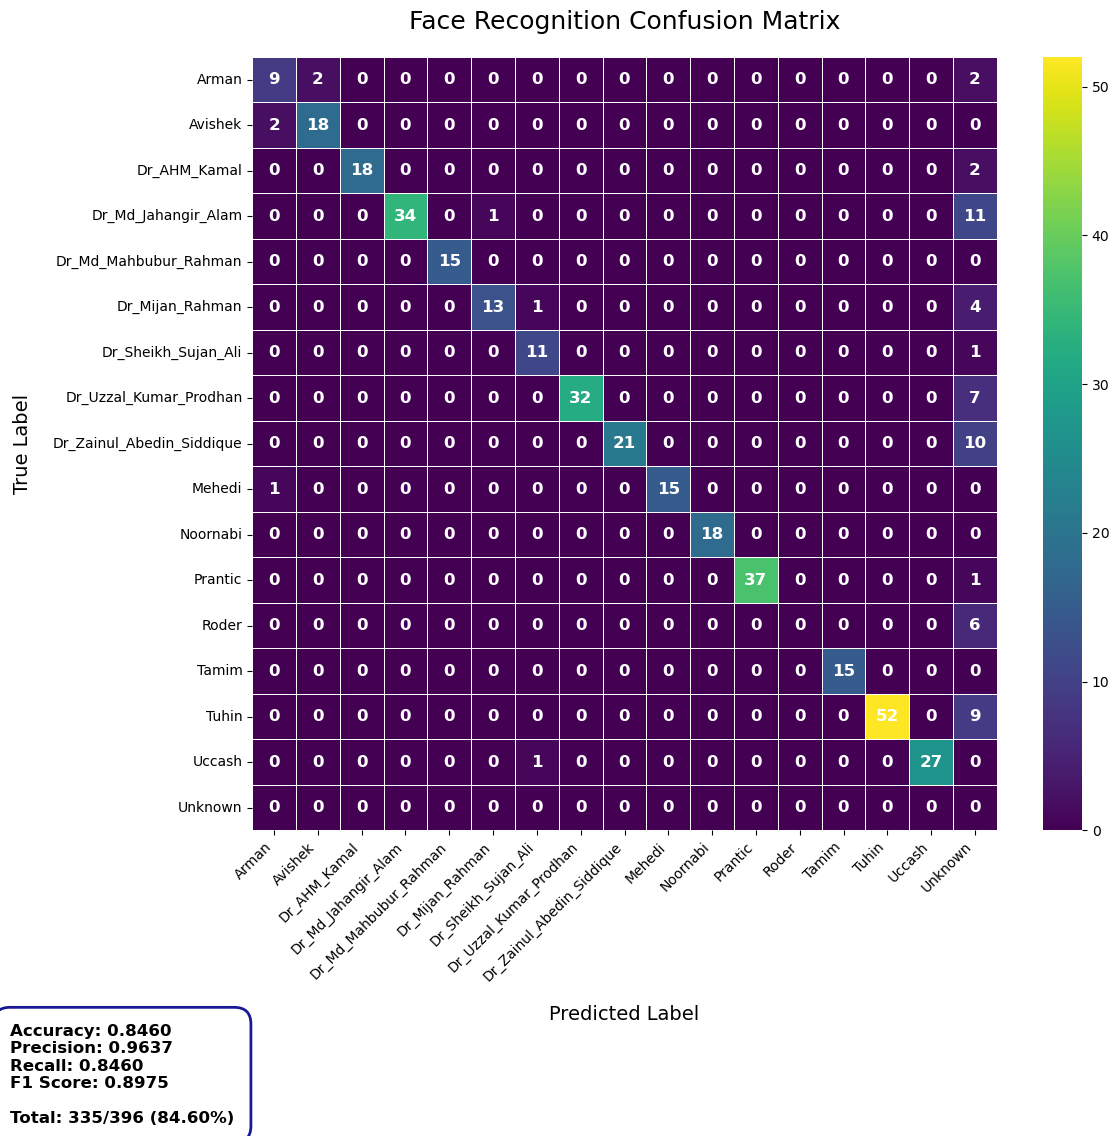


Classification Metrics:
Accuracy: 0.8460
Precision: 0.9637
Recall: 0.8460
F1 Score: 0.8975

Confusion Matrix Stats:
Total correct predictions: 335
Total samples: 396
Overall accuracy: 0.8460


In [ ]:
import os
import numpy as np
import pickle
from keras.models import Model
from align import AlignDlib
import cv2
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load embedding model
nn4_small2.load_weights('weights/nn4.small2.v1.h5')
embedding_model = Model(inputs=nn4_small2.input, outputs=nn4_small2.get_layer('dense_layer').output)

# Load known embeddings
with open('outputs/face_embeddings.pkl', 'rb') as f:
    known_embeddings = pickle.load(f)

# Prepare test set
test_metadata = load_metadata('dataset')

y_true = []
y_pred = []

alignment = AlignDlib('models/landmarks.dat')

# Process each test image
for person in test_metadata:
    img = load_image(person.image_path())
    if img is None:
        continue
    bb = alignment.getLargestFaceBoundingBox(img)
    if bb is None:
        continue
    aligned = alignment.align(96, img, bb, landmarkIndices=AlignDlib.OUTER_EYES_AND_NOSE)
    if aligned is None:
        continue
    aligned = aligned.astype('float32') / 255.0
    embedding = embedding_model.predict(np.expand_dims(aligned, axis=0), verbose=0)[0]
    embedding = embedding / np.linalg.norm(embedding)

    # Find most similar face
    min_dist = float('inf')
    pred_identity = "Unknown"
    for name, known_emb in known_embeddings.items():
        cos_dist = 1 - np.dot(embedding, known_emb)
        if cos_dist < min_dist and cos_dist < 0.2:
            min_dist = cos_dist
            pred_identity = name

    y_true.append(person.name)
    y_pred.append(pred_identity)

# Compute confusion matrix
labels = sorted(list(set(y_true) | set(y_pred)))
cm = confusion_matrix(y_true, y_pred, labels=labels)

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, labels=labels, average='weighted', zero_division=0)
recall = recall_score(y_true, y_pred, labels=labels, average='weighted', zero_division=0)
f1 = f1_score(y_true, y_pred, labels=labels, average='weighted', zero_division=0)

# Determine figure size based on number of classes
num_classes = len(labels)
fig_size = max(12, num_classes * 0.7)  # Increase figure size for readability
fig, ax = plt.subplots(figsize=(fig_size, fig_size))

# Create a colorful heatmap
sns.heatmap(
    cm, 
    annot=True,           # Show numbers in cells
    fmt="d",              # Format as integers
    cmap="viridis",       # More colorful palette
    xticklabels=labels,   # X-axis labels
    yticklabels=labels,   # Y-axis labels
    linewidths=0.5,       # Width of grid lines
    linecolor='white',    # White grid lines stand out better
    cbar=True,            # Include color bar
    annot_kws={"size": 12, "weight": "bold", "color": "white"}  # White text for better contrast
)

# Add title and labels with adequate spacing
plt.title('Face Recognition Confusion Matrix', fontsize=18, pad=20)
plt.xlabel('Predicted Label', fontsize=14, labelpad=15)
plt.ylabel('True Label', fontsize=14, labelpad=15)

# Rotate x labels and give them more space
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Create metrics box
metrics_text = (
    f"Accuracy: {accuracy:.4f}\n"
    f"Precision: {precision:.4f}\n"
    f"Recall: {recall:.4f}\n"
    f"F1 Score: {f1:.4f}"
)

# Calculate totals
total_correct = np.trace(cm)
total_samples = np.sum(cm)
total_text = f"Total: {total_correct}/{total_samples} ({accuracy:.2%})"

# Move the metrics box to the left side
plt.figtext(0.01, 0.01,   # x=0.01 (far left), y=0.01 (bottom)
             metrics_text + "\n\n" + total_text,
             fontsize=12,
             fontweight='bold',
             ha='left',    # Align text to the left side of the box
             bbox=dict(facecolor='white', 
                       alpha=0.9, 
                       boxstyle='round,pad=1.0', 
                       edgecolor='darkblue',
                       linewidth=2))

# Adjust layout
plt.tight_layout(rect=[0, 0.08, 1, 0.95])


# Save the figure with high resolution
plt.savefig('outputs/confusion_matrix_colorful.jpg', dpi=300, bbox_inches='tight')
plt.show()

# Print metrics to console
print("\nClassification Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"\nConfusion Matrix Stats:")
print(f"Total correct predictions: {total_correct}")
print(f"Total samples: {total_samples}")
print(f"Overall accuracy: {accuracy:.4f}")